In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from matplotlib import font_manager, rc
font_location = "c:/Windows/fonts/malgun.ttf"
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

import folium
from folium.plugins import MarkerCluster
!pip install git+https://github.com/python-visualization/branca.git@master # 커널 재시작하기
matplotlib.rcParams['axes.unicode_minus'] = False 

ERROR: Invalid requirement: '#'


# 장서기준 

In [2]:
#coll_change = 장서 증가/폐기 데이터
coll_change = pd.read_excel(r"C:\Users\안지은\Downloads\데안심_외부데이터2\2020장서증가폐기.xls")
coll_change.drop('지역',1,inplace=True)
coll_change.head()

In [3]:
# coll = 장서 데이터
coll = pd.read_excel(r"C:\Users\안지은\Downloads\데안심_외부데이터\publicCollection2018to2020raw.xlsx")
coll.head()

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,2018 전자저널수,2020 전자도서수,2019 전자도서수,2018 전자도서수,2020 연속간행물수,2019 연속간행물수,2018 연속간행물수
0,서울 종로구,4.19 혁명기념 도서관,61577,60363.0,59917.0,1297,1297.0,1297.0,0,0.0,0.0,0,0.0,0.0,31,31.0,60.0
1,서울 송파구,가락몰도서관,29408,26120.0,23073.0,0,0.0,0.0,0,0.0,0.0,3831,3276.0,3596.0,58,58.0,50.0
2,서울 중구,가온도서관,68460,63609.0,56588.0,0,1416.0,1450.0,0,0.0,0.0,4489,4266.0,4017.0,58,50.0,54.0
3,서울 양천구,갈산도서관,46396,44684.0,40635.0,0,0.0,75.0,0,0.0,0.0,7875,8841.0,8740.0,9,35.0,39.0
4,서울 강남구,강남구립 역삼푸른솔 도서관,39750,39456.0,36669.0,5,0.0,0.0,0,0.0,0.0,23096,21668.0,20481.0,26,22.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,서울 성북구,해오름도서관,42496,44496.0,NaN,1516,1461.0,NaN,0,0.0,NaN,0,0.0,NaN,17,18.0,NaN
184,서울 강남구,행복한도서관,46192,45809.0,46197.0,203,0.0,0.0,0,0.0,0.0,23096,21668.0,20481.0,34,25.0,10.0
185,서울 노원구,향기나무도서관,13073,12593.0,7078.0,265,265.0,262.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
186,서울 노원구,화랑도서관,51095,47915.0,45376.0,2972,2939.0,3011.0,0,0.0,0.0,0,0.0,0.0,31,27.0,27.0


In [5]:
# serve_pop = 봉사대상자 수
serv_pop = pd.read_excel(r"C:\Users\안지은\Downloads\데안심_외부데이터2\2021('20년실적)도서관별통계입력데이터_공공도서관_(최종) .xlsx")#20년기준 사용
serv_pop = serv_pop[serv_pop['지역']=='서울'] 
serv_pop = serv_pop[['도서관명','설립주체','운영방식','도서관장_사서자격증','봉사대상지역','봉사대상자수_어린이','봉사대상자수_청소년','봉사대상자수_성인']]
serv_pop.reset_index(inplace= True, drop = True)
serv_pop.head()

,도서관명,설립주체,운영방식,도서관장_사서자격증,봉사대상지역,봉사대상자수_어린이,봉사대상자수_청소년,봉사대상자수_성인
0,4.19 혁명기념 도서관,사립,직영,무,서울 종로구,11632,6908,130844
1,가락몰도서관,사립,위탁,유,서울 송파구,74083,35729,558148
2,가온도서관,지자체,위탁,유,서울 중구,9341,4268,111631
3,갈산도서관,지자체,직영,유,서울 양천구,51480,30944,371827
4,강남구립 역삼푸른솔 도서관,지자체,위탁,유,서울 강남구,60114,35786,443331


In [6]:
# 데이터 프레임 병함 -> df
df = pd.merge(coll, serv_pop,on = '도서관명',how = 'outer')
df = pd.merge(df, coll_change,on = '도서관명',how = 'outer')

In [7]:
# 결측치 확인
null_serv_pop = df[df['봉사대상자수_어린이'].isnull()] 
null_coll = df[df['2020 도서수'].isnull()] 

In [8]:
null_serv_pop.head()

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,설립주체,운영방식,도서관장_사서자격증,봉사대상지역,봉사대상자수_어린이,봉사대상자수_청소년,봉사대상자수_성인,구입,기증,제적


In [9]:
null_coll.head()

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,설립주체,운영방식,도서관장_사서자격증,봉사대상지역,봉사대상자수_어린이,봉사대상자수_청소년,봉사대상자수_성인,구입,기증,제적


In [10]:
#df.drop('봉사대상지역',1,inplace = True)
# 총 봉사 대상자 수 컬럼 추가하기
df['봉사대상자수'] = df['봉사대상자수_어린이'] +df['봉사대상자수_청소년'] + df['봉사대상자수_성인']
df.head()

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,운영방식,도서관장_사서자격증,봉사대상지역,봉사대상자수_어린이,봉사대상자수_청소년,봉사대상자수_성인,구입,기증,제적,봉사대상자수
0,서울 종로구,4.19 혁명기념 도서관,61577,60363.0,59917.0,1297,1297.0,1297.0,0,0.0,...,직영,무,서울 종로구,11632,6908,130844,1161,21,0,149384
1,서울 송파구,가락몰도서관,29408,26120.0,23073.0,0,0.0,0.0,0,0.0,...,위탁,유,서울 송파구,74083,35729,558148,1809,1468,39,667960
2,서울 중구,가온도서관,68460,63609.0,56588.0,0,1416.0,1450.0,0,0.0,...,위탁,유,서울 중구,9341,4268,111631,4644,45,1846,125240
3,서울 양천구,갈산도서관,46396,44684.0,40635.0,0,0.0,75.0,0,0.0,...,직영,유,서울 양천구,51480,30944,371827,3201,212,1416,454251
4,서울 강남구,강남구립 역삼푸른솔 도서관,39750,39456.0,36669.0,5,0.0,0.0,0,0.0,...,위탁,유,서울 강남구,60114,35786,443331,2881,85,2500,539231


In [11]:
# 봉사 대상자 수 구간 설정
pop_crt = [] 
for i in range(len(df)):
    if df['봉사대상자수'][i] < 20000:
        pop_crt.append('2만 미만')
    elif df['봉사대상자수'][i] >= 20000 and df['봉사대상자수'][i] < 50000:
        pop_crt.append('2만 이상 5만 미만')
    elif df['봉사대상자수'][i] >= 50000 and df['봉사대상자수'][i] < 100000:
        pop_crt.append('5만 이상 10만 미만')
    elif df['봉사대상자수'][i] >= 100000 and df['봉사대상자수'][i] < 300000:
        pop_crt.append('10만 이상 30만 미만')
    elif df['봉사대상자수'][i] >= 300000 and df['봉사대상자수'][i] < 500000:
        pop_crt.append('30만 이상 50만 미만')
    else:
        pop_crt.append('50만 이상')

In [12]:
# 봉사대상 기준인구 칼럼 추가
df['봉사대상 기준인구'] = pd.DataFrame(pop_crt)
df.head()

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,도서관장_사서자격증,봉사대상지역,봉사대상자수_어린이,봉사대상자수_청소년,봉사대상자수_성인,구입,기증,제적,봉사대상자수,봉사대상 기준인구
0,서울 종로구,4.19 혁명기념 도서관,61577,60363.0,59917.0,1297,1297.0,1297.0,0,0.0,...,무,서울 종로구,11632,6908,130844,1161,21,0,149384,10만 이상 30만 미만
1,서울 송파구,가락몰도서관,29408,26120.0,23073.0,0,0.0,0.0,0,0.0,...,유,서울 송파구,74083,35729,558148,1809,1468,39,667960,50만 이상
2,서울 중구,가온도서관,68460,63609.0,56588.0,0,1416.0,1450.0,0,0.0,...,유,서울 중구,9341,4268,111631,4644,45,1846,125240,10만 이상 30만 미만
3,서울 양천구,갈산도서관,46396,44684.0,40635.0,0,0.0,75.0,0,0.0,...,유,서울 양천구,51480,30944,371827,3201,212,1416,454251,30만 이상 50만 미만
4,서울 강남구,강남구립 역삼푸른솔 도서관,39750,39456.0,36669.0,5,0.0,0.0,0,0.0,...,유,서울 강남구,60114,35786,443331,2881,85,2500,539231,50만 이상


In [13]:
# 봉사대상 기준인구 별 도서관 수 카운트
serv_pop_ = pd.DataFrame(df.groupby('봉사대상 기준인구').count()['도서관명'])
serv_pop_.columns = ['도서관 수']
serv_pop_

,도서관 수
봉사대상 기준인구,
10만 이상 30만 미만,28
30만 이상 50만 미만,114
50만 이상,46


Text(0.5, 1.0, '봉사대상 기준인구별 도서관 수')

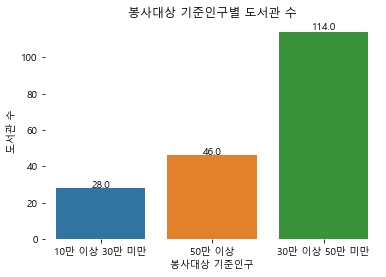

In [14]:
# 시각화
serv_pop_.sort_values('도서관 수',inplace = True)
ax= sns.barplot(x = serv_pop_.index, y = '도서관 수' ,data = serv_pop_)
plt.box(False)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f"%(height), (left+width/2, height*1.01), ha='center')
plt.title('봉사대상 기준인구별 도서관 수')

- 2020기준 서울: 봉사대상인구 10만 미만인 공공도서관은 없음.
- 봉사대상인구 10만 이상 30만 미만인 도서관의 수가 가장 많고, 그 다음으로 50만 이상인 도서관 수가 많음

## 1. 도서관법 시행령 기준 준수 여부 

In [15]:
# 기준 : 도서관법 시행령 기준 준수 여부

df.fillna(0, inplace = True)
lib_law = []
for i in range(len(df)):
    if df['설립주체'][i] != '사립':
        if df['봉사대상 기준인구'][i] == '10만 이상 30만 미만':
            if df['2020 도서수'][i] >= 30000 and df['구입'][i]+df['기증'][i] >= 3000:
                lib_law.append('준수')
            else:
                lib_law.append('미준수')
        elif df['봉사대상 기준인구'][i] == '30만 이상 50만 미만':
            if df['2020 도서수'][i] >= 90000 and df['구입'][i]+df['기증'][i] >= 9000:
                lib_law.append('준수')
            else:
                lib_law.append('미준수')
        else:
            if df['2020 도서수'][i] >= 150000 and df['구입'][i]+df['기증'][i] >= 15000:
                lib_law.append('준수')
            else:
                lib_law.append('미준수')
    else:
        if df['2020 도서수'][i] >= 3000 and df['구입'][i]+df['기증'][i] >= 300:
            lib_law.append('준수')
        else:
            lib_law.append('미준수')

In [16]:
# 준수 여부 판별
df.fillna(0, inplace = True)
lib_law_se_mul = []
for i in range(len(df)):
    if (df['설립주체'][i] != '사립' and df['2020 시청각자료수'][i] >= int(df['봉사대상자수'][i]/100) and df['2020 시청각자료수'][i]-df['2019 시청각자료수'][i] >= int(df['봉사대상자수'][i]/1000) and df['2020 연속간행물수'][i] >= int(df['봉사대상자수'][i]/1000)) or (df['설립주체'][i] =='사립'):
        lib_law_se_mul.append('준수')
    else:
        lib_law_se_mul.append('미준수')

In [17]:
# 준수 여부 판별 칼럼 추가
df['도서관법 장서기준 준수여부(도서)'] = pd.DataFrame(lib_law)
df['도서관법 장서기준 준수여부(시청각/연속간행물)'] = pd.DataFrame(lib_law_se_mul)

In [18]:
# 준수 여부 별 도서관 수 카운트(도서자료)
lib_law_ = pd.DataFrame(df.groupby('도서관법 장서기준 준수여부(도서)').count()['도서관명'])
lib_law_.columns = ['도서관 수']
lib_law_

,도서관 수
도서관법 장서기준 준수여부(도서),
미준수,142
준수,46


In [19]:
# 준수 여부 별 도서관 수 카운트(비도서자료)
lib_law_se_mul = pd.DataFrame(df.groupby('도서관법 장서기준 준수여부(시청각/연속간행물)').count()['도서관명'])
lib_law_se_mul.columns = ['도서관 수']
lib_law_se_mul

,도서관 수
도서관법 장서기준 준수여부(시청각/연속간행물),
미준수,178
준수,10


Text(0.5, 1.0, '도서관법 장서기준 준수여부 비율(도서)')

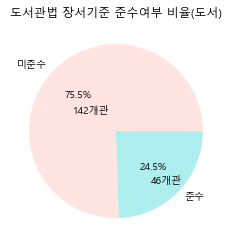

In [20]:
# 도서자료 장서기준 준수 여부 도서관 수 시각화
colors = ['mistyrose','paleturquoise']
plt.pie(lib_law_['도서관 수'].tolist(), labels = lib_law_.index, autopct = '%1.1f%%',colors = colors)
plt.text(-0.5,0.2, '142개관')
plt.text(0.4,-0.6, '46개관')
plt.title("도서관법 장서기준 준수여부 비율(도서)")

Text(0.5, 1.0, '도서관법 장서기준 준수여부 비율(시청각/연속간행물)')

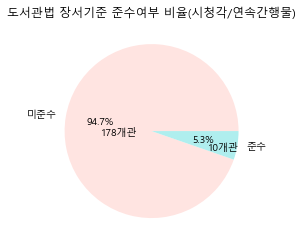

In [21]:
# 비도서자료 장서기준 준수 여부 도서관 수 시각화
colors = ['mistyrose','paleturquoise']
plt.pie(lib_law_se_mul['도서관 수'].tolist(), labels = lib_law_se_mul.index, autopct = '%1.1f%%',colors = colors)
plt.text(-0.58,-0.05, '178개관')
plt.text(0.65,-0.23, '10개관')
plt.title("도서관법 장서기준 준수여부 비율(시청각/연속간행물)")

- 도서 수로만 따졌을 때도 다수의 도서관이 법적으로 지정된 장서 기준을 충족하지 못함을 확인할 수 있다.
- 시청각/연속간행물의 경우, 대다수의 도서관이 조건을 충족하지 못한다.

## 2. KLA 기준 충족 여부

In [19]:
kla_book = []
for i in range(len(df)):
    if df['2020 도서수'][i] >= df['봉사대상자수'][i]*2 and df['구입'][i]+df['기증'][i] >= df['봉사대상자수'][i]*0.2:
        kla_book.append('준수')
    else:
        kla_book.append('미준수')
df['kla장서기준 준수여부(도서)'] = pd.DataFrame(kla_book)


In [20]:
kla_b = pd.DataFrame(df.groupby('kla장서기준 준수여부(도서)').count()['도서관명'])
kla_b.columns = ['도서관 수']
kla_b

,도서관 수
kla장서기준 준수여부(도서),
미준수,187
준수,1


In [21]:
kla_mul = []
for i in range(len(df)):
    non_book20 = df['2020 시청각자료수'][i] + df['2020 전자저널수'][i] + df['2020 전자도서수'][i] 
    non_book19 = df['2019 시청각자료수'][i] + df['2019 전자저널수'][i] + df['2019 전자도서수'][i]
    if df['2020 연속간행물수'][i] >= int(df['봉사대상자수'][i]/1000)*3+50 and non_book20 >= int(df['봉사대상자수'][i]/1000)*40 and non_book20-non_book19 >= 4:
        kla_mul.append('준수')
    else:
        kla_mul.append('미준수')
df['kla장서기준 준수여부(비도서/연속간행물)'] = pd.DataFrame(kla_mul)


In [22]:
kla_m = pd.DataFrame(df.groupby('kla장서기준 준수여부(비도서/연속간행물)').count()['도서관명'])
kla_m.columns = ['도서관 수']
kla_m

,도서관 수
kla장서기준 준수여부(비도서/연속간행물),
미준수,184
준수,4


- kla 장서기준을 만족하는 도서관은 거의 없다.

## 3. 구별 현황 파악 - 도서 자료로만 (비도서자료 충족기준까지 보기에는 너무 수가 적음)
* kla기준의 경우 만족하는 지역이 거의 없음
* 도서관법 비도서자료의 경우에도 충족하는 도서관이 거의 없으므로 시각화가 무의미하다고 판단.

In [22]:
# 구별 groupby를 위해 구 이름만 취함
for i in range(len(df)):
    df['지역'][i] = df['지역'][i][3:] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
# 지역과 준수 여부로 groupby -> loc_lib_b
loc_lib_b = pd.DataFrame(df.groupby(['지역','도서관법 장서기준 준수여부(도서)']).count()['도서관명'])
loc_lib_b.reset_index(inplace = True)
loc_lib_b_y = loc_lib_b[loc_lib_b['도서관법 장서기준 준수여부(도서)']=='준수']
loc_lib_b_n = loc_lib_b[loc_lib_b['도서관법 장서기준 준수여부(도서)']=='미준수']

In [26]:
#loc_lib_b_y -> 지역별 준수 도서관 
#loc_lib_b_n -> 지역별 미준수 도서관
loc_lib_b_y = loc_lib_b_y.sort_values('도서관명',ascending = False)
loc_lib_b_y.reset_index(inplace = True, drop = True)
loc_lib_b_n = loc_lib_b_n.sort_values('도서관명', ascending = False)
loc_lib_b_n.reset_index(inplace = True, drop = True)
loc_lib_b_n.columns = ['지역','도서관법 장서기준 준수여부(도서)','도서관 수']
loc_lib_b_y.columns = ['지역','도서관법 장서기준 준수여부(도서)','도서관 수']

In [27]:
# 구 내의 모든 도서관이 도서관법 장서기준 충족하는 지역
set(loc_lib_b['지역']) - set(loc_lib_b_n['지역'])

{'금천구', '용산구'}

In [28]:
# 구 내의 모든 도서관이 도서관법 장서기준을 충족하지 못하는 지역
set(loc_lib_b['지역']) - set(loc_lib_b_y['지역'])

{'강남구', '강서구', '관악구', '노원구', '성북구'}

Text(-0.48, 1.1, '1개관')

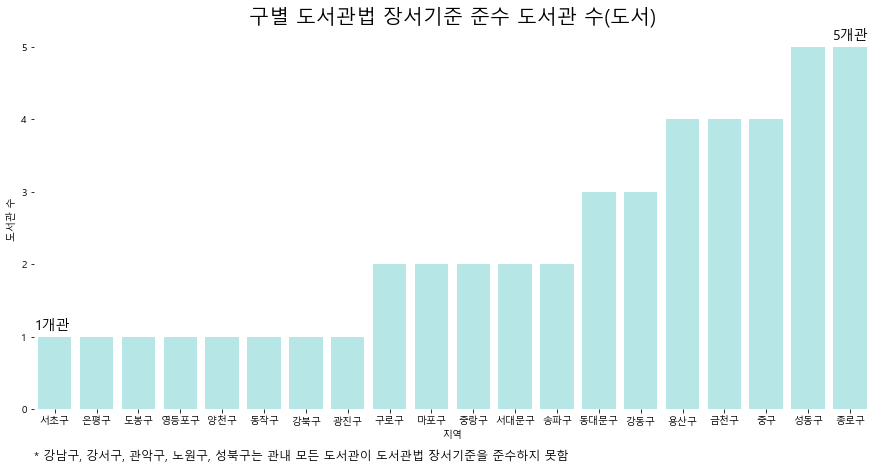

In [29]:
# 구별 도서관법 장서기준 준수 도서관 수
plt.figure(figsize = (15,7))
loc_lib_b_y.sort_values(by= '도서관 수', ascending = True, inplace= True)
sns.barplot(x='지역',y = '도서관 수', data = loc_lib_b_y,color = 'paleturquoise')
plt.box(False)
plt.title('구별 도서관법 장서기준 준수 도서관 수(도서)',fontsize = 20)
plt.text(-0.5,-0.7,'* 강남구, 강서구, 관악구, 노원구, 성북구는 관내 모든 도서관이 도서관법 장서기준을 준수하지 못함', fontsize = 12)
plt.text(18.6, 5.1, '5개관', fontsize = 14)
plt.text(-0.48, 1.1, '1개관', fontsize = 14)

Text(-0.48, 2.3, '2개관')

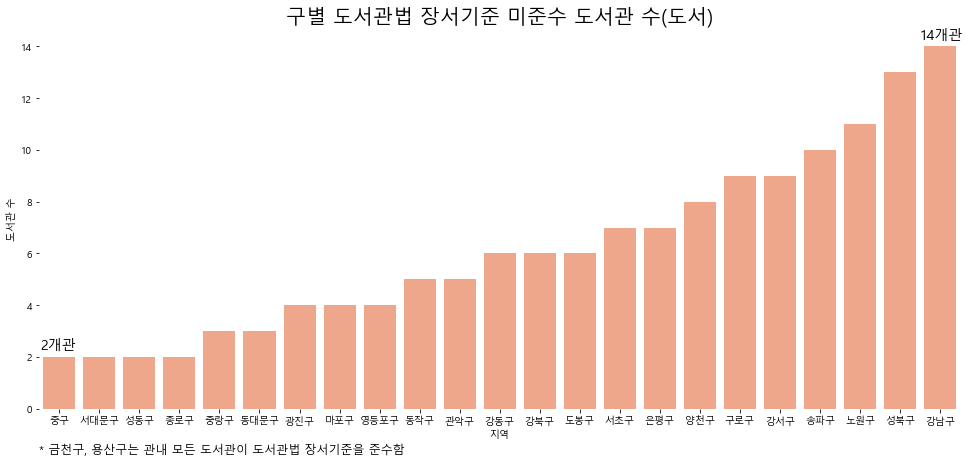

In [30]:
# 구별 도서관법 장서기준 미준수 도서관 수
plt.figure(figsize = (16.5,7))
loc_lib_b_n.sort_values(by= '도서관 수', ascending = True, inplace= True)
sns.barplot(x='지역',y = '도서관 수', data = loc_lib_b_n,color = 'lightsalmon')
plt.box(False)
plt.title('구별 도서관법 장서기준 미준수 도서관 수(도서)',fontsize = 20)
plt.text(-0.5,-1.7,'* 금천구, 용산구는 관내 모든 도서관이 도서관법 장서기준을 준수함', fontsize = 12)
plt.text(21.5, 14.3, '14개관', fontsize = 14)
plt.text(-0.48, 2.3, '2개관', fontsize = 14)

## 3. folium 시각화

In [32]:
import json
#df_loc -> 서울관내공공도서관 위경도 데이터
df_loc = pd.read_csv(r"C:\Users\안지은\Downloads\서울관내공공도서관_위경도.csv", encoding ='cp949') # 이름이 맞지 않는 도서관을 모두 전처리한 파일

geo_str = json.load(open(r"C:\Users\안지은\Downloads\데안심_외부데이터2\seoul_municipalities_geo_simple.json", encoding='utf-8'))
#geo_str = json.load(open(r"C:\Users\안지은\Desktop\seoulmap.json", encoding='utf-8'))

In [33]:
# 서울관내공공도서관 위경도 파일에 없는 도서관 제거
set_df = list(set(df['도서관명']) - set(df_loc['도서관명'])) 
set_df_loc = list(set(df_loc['도서관명']) - set(df['도서관명']))

In [34]:
set_df_loc # --> 장서 데이터에 없는 도서관

['가좌행복작은도서관', '양천중앙도서관', '오류도서관', '신당누리도서관', '다산성곽도서관']

### 지도시각화 - 1 : 도서관별 장서기준 준수 여부 / 도서관 장서 규모 확인

In [35]:
# df_fol -> 서울관내공공도서관 위경도 데이터와 공공도서관 데이터 병합
df_fol = pd.merge(df,df_loc,on='도서관명',how = 'inner')
df_fol.head()

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,제적,봉사대상자수,봉사대상 기준인구,도서관법 장서기준 준수여부(도서),도서관법 장서기준 준수여부(시청각/연속간행물),Unnamed: 0,구명,도서관 구분명,위도,경도
0,종로구,4.19 혁명기념 도서관,61577,60363.0,59917.0,1297,1297.0,1297.0,0,0.0,...,0,149384,10만 이상 30만 미만,준수,준수,171,종로구,공공도서관,37.567511,126.965532
1,송파구,가락몰도서관,29408,26120.0,23073.0,0,0.0,0.0,0,0.0,...,39,667960,50만 이상,준수,준수,132,송파구,공공도서관,37.494674,127.108649
2,중구,가온도서관,68460,63609.0,56588.0,0,1416.0,1450.0,0,0.0,...,1846,125240,10만 이상 30만 미만,준수,미준수,178,중구,공공도서관,37.556385,127.010837
3,양천구,갈산도서관,46396,44684.0,40635.0,0,0.0,75.0,0,0.0,...,1416,454251,30만 이상 50만 미만,미준수,미준수,144,양천구,공공도서관,37.508985,126.867139
4,강남구,강남구립 역삼푸른솔 도서관,39750,39456.0,36669.0,5,0.0,0.0,0,0.0,...,2500,539231,50만 이상,미준수,미준수,1,강남구,공공도서관,37.496497,127.032027


In [37]:
# 지도시각화 1 : 붉은색 원 = 장서기준 미준수 도서관 / 파란색 원 = 장서기준 준수 도서관
# 원 크기 : 장서 수

center = [37.541, 126.986]
m = folium.Map(location=center, zoom_start=11)

for i in range(len(df)):
    if df_fol['도서관법 장서기준 준수여부(도서)'][i] == '준수':
        folium.Circle(
            location = df_fol.loc[i, ['위도', '경도']],
            radius = df_fol['2020 도서수'][i]*0.003,
            color = 'blue').add_to(m)
    else:
        folium.Circle(
            location = df_fol.loc[i, ['위도', '경도']],
            radius =  df_fol['2020 도서수'][i]*0.003,
            color = 'red').add_to(m)
        
m

### 지도시각화 2 - 구별 관내 도서관 수 및 장서기준 준수 여부 확인

In [38]:
import json
geo_path = r"C:\Users\안지은\Downloads\데안심_외부데이터2\seoul_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding = 'utf-8'))

In [39]:
# cnt_lib - 지역 코드와 지역별 도서관 수 데이터 병합
code = pd.read_excel(r"C:\Users\안지은\Downloads\데안심_외부데이터2\행정동코드_서울.xlsx")
cnt_lib = pd.DataFrame(df_fol.groupby(['지역']).count()['도서관명'])
cnt_lib.reset_index(inplace = True)
cnt_lib = pd.merge(cnt_lib, code, on='지역',how = 'inner')

In [40]:
m2 =  folium.Map(location=center, zoom_start=10)
m2.choropleth(geo_data = geo_str,
             data = cnt_lib,
             columns = ['지역','도서관명'],
             highlight = True,
            key_on = 'properties.name',
              fill_color = 'BuPu',
             fill_opacity = 0.5, line_opacity = 2,
             legend_name = '관내 도서관 수')
for i in range(len(df)):
    if df_fol['도서관법 장서기준 준수여부(도서)'][i] == '준수':
        folium.Circle(
            location = df_fol.loc[i, ['위도', '경도']],
            radius = 14,
            color = 'blue').add_to(m2)
    else:
        folium.Circle(
            location = df_fol.loc[i, ['위도', '경도']],
            radius =  14,
            color = 'red').add_to(m2)
m2

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [43]:
# 마커를 변경 -> 커서 이동 시 도서관 명 또한 보이도록

center = [37.541, 126.986]
m1 =  folium.Map(location=center, zoom_start=10)
m1.choropleth(geo_data = geo_str,
             data = cnt_lib,
             columns = ['지역','도서관명'],
             highlight = True,
            key_on = 'properties.name',
              fill_color = 'BuPu',
             fill_opacity = 0.5, line_opacity = 2,
             legend_name = '관내 도서관 수')

marker_cluster_y = MarkerCluster().add_to(m1)
marker_cluster_n = MarkerCluster().add_to(m2)
for i in range(len(df)):
    if df_fol['도서관법 장서기준 준수여부(도서)'][i] == '준수':
        folium.Marker(
            location = df_fol.loc[i, ['위도', '경도']],
            tiles='cartodbpositron',
            tooltip = df_fol.loc[i, '도서관명'],
            icon=folium.Icon(color='blue',icon='book'),
            popup = df_fol.loc[i, '도서관법 장서기준 준수여부(도서)']).add_to(m1)
    else:
        folium.Marker(
            location = df_fol.loc[i, ['위도', '경도']],
            tiles='cartodbpositron',
            tooltip = df_fol.loc[i, '도서관명'],
            icon=folium.Icon(color='red',icon='book'),
            popup = df_fol.loc[i, '도서관법 장서기준 준수여부(도서)']).add_to(m1)
        
m1


C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


# 예산

In [44]:
# 의미 없는 컬럼 제거
df = df_fol.drop(['Unnamed: 0','구명','도서관 구분명'],1)
df.head()

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,봉사대상자수_성인,구입,기증,제적,봉사대상자수,봉사대상 기준인구,도서관법 장서기준 준수여부(도서),도서관법 장서기준 준수여부(시청각/연속간행물),위도,경도
0,종로구,4.19 혁명기념 도서관,61577,60363.0,59917.0,1297,1297.0,1297.0,0,0.0,...,130844,1161,21,0,149384,10만 이상 30만 미만,준수,준수,37.567511,126.965532
1,송파구,가락몰도서관,29408,26120.0,23073.0,0,0.0,0.0,0,0.0,...,558148,1809,1468,39,667960,50만 이상,준수,준수,37.494674,127.108649
2,중구,가온도서관,68460,63609.0,56588.0,0,1416.0,1450.0,0,0.0,...,111631,4644,45,1846,125240,10만 이상 30만 미만,준수,미준수,37.556385,127.010837
3,양천구,갈산도서관,46396,44684.0,40635.0,0,0.0,75.0,0,0.0,...,371827,3201,212,1416,454251,30만 이상 50만 미만,미준수,미준수,37.508985,126.867139
4,강남구,강남구립 역삼푸른솔 도서관,39750,39456.0,36669.0,5,0.0,0.0,0,0.0,...,443331,2881,85,2500,539231,50만 이상,미준수,미준수,37.496497,127.032027


In [45]:
# budget = 도서관별 예산 데이터 / 기준연도 2018년은 제거
budget = pd.read_excel(r"C:\Users\안지은\Downloads\데안심_외부데이터\publiclibBudget2018to2020.xlsx")
budget = budget[budget['기준연도'] != 2018]
budget

,기준연도,지역,도서관명,인건비(천원),자료구입비(천원),운영비(천원)
0,2020,서울 종로구,4.19 혁명기념 도서관,580257,13201,996025
1,2020,서울 송파구,가락몰도서관,128099,31958,21960
2,2020,서울 중구,가온도서관,354082,124806,270513
3,2020,서울 양천구,갈산도서관,199052,66695,139769
4,2020,서울 강남구,강남구립 역삼푸른솔 도서관,210432,41897,54210
...,...,...,...,...,...,...
363,2019,서울 성북구,해오름도서관,101634,24546,44438
364,2019,서울 강남구,행복한도서관,277063,36592,49896
365,2019,서울 노원구,향기나무도서관,27197,12180,6400
366,2019,서울 노원구,화랑도서관,300638,48416,165660


In [46]:
# 분과별 예산 분담 비율 컬럼 추가
budget['총예산(천원)'] = budget['자료구입비(천원)']+budget['인건비(천원)']+budget['운영비(천원)']
budget['자료구입비 비율(%)'] =  budget['자료구입비(천원)']/budget['총예산(천원)']*100
budget['인건비 비율(%)'] =  budget['인건비(천원)']/budget['총예산(천원)']*100
budget['운영비 비율(%)'] =  budget['운영비(천원)']/budget['총예산(천원)']*100

In [47]:
# 2019년, 2020년 예산 데이터프레임 분리
budget19 = budget[budget['기준연도'] == 2019]
budget20 = budget[budget['기준연도'] == 2020]

In [48]:
# 연도별 예산 구분 위해 컬럼명 변경
budget19.drop(['기준연도','지역'],1,inplace = True)
budget19.columns = ['도서관명','19년_인건비(천원)','19년_자료구입비(천원)','19년_운영비(천원)','19년_총예산(천원)','19년_자료구입비 비율','19년_인건비 비율','19년_운영비 비율']
budget20.drop(['기준연도','지역'],1,inplace = True)
budget20.columns = ['도서관명','20년_인건비(천원)','20년_자료구입비(천원)','20년_운영비(천원)','20년_총예산(천원)','20년_자료구입비 비율','20년_인건비 비율','20년_운영비 비율']

C:\Users\안지은\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
# df_bud -> 공공도서관 데이터와 예산 데이터 병합
df_bud = pd.merge(df,budget19,on='도서관명',how ='outer')
df_bud = pd.merge(df_bud,budget20,on='도서관명',how ='outer')
df_bud.head()

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,19년_자료구입비 비율,19년_인건비 비율,19년_운영비 비율,20년_인건비(천원),20년_자료구입비(천원),20년_운영비(천원),20년_총예산(천원),20년_자료구입비 비율,20년_인건비 비율,20년_운영비 비율
0,종로구,4.19 혁명기념 도서관,61577.0,60363.0,59917.0,1297.0,1297.0,1297.0,0.0,0.0,...,0.898198,40.656095,58.445706,580257.0,13201.0,996025.0,1589483.0,0.830522,36.506021,62.663457
1,송파구,가락몰도서관,29408.0,26120.0,23073.0,0.0,0.0,0.0,0.0,0.0,...,17.535347,70.391414,12.073238,128099.0,31958.0,21960.0,182017.0,17.557701,70.377492,12.064807
2,중구,가온도서관,68460.0,63609.0,56588.0,0.0,1416.0,1450.0,0.0,0.0,...,12.068241,45.529486,42.402273,354082.0,124806.0,270513.0,749401.0,16.654101,47.248669,36.097230
3,양천구,갈산도서관,46396.0,44684.0,40635.0,0.0,0.0,75.0,0.0,0.0,...,14.057021,64.040475,21.902505,199052.0,66695.0,139769.0,405516.0,16.446947,49.086103,34.466951
4,강남구,강남구립 역삼푸른솔 도서관,39750.0,39456.0,36669.0,5.0,0.0,0.0,0.0,0.0,...,12.250263,67.099895,20.649842,210432.0,41897.0,54210.0,306539.0,13.667755,68.647709,17.684536


In [50]:
#2019 예산데이터가 없는 도서관 
df_bud[df_bud['19년_총예산(천원)'].isnull()][['지역','도서관명']]

,지역,도서관명
6,강남구,강남구립열린도서관
8,강동구,강동구립둔촌도서관
34,동작구,구립김영삼도서관
41,성북구,글빛도서관
64,동대문구,동대문책마당도서관
115,서초구,서초청소년도서관
122,성동구,성동구립숲속도서관
132,중구,손기정어린이도서관
161,광진구,자양한강도서관


In [51]:
# 2019 예산데이터만 있는 경우 : 동작상도국주도서관
df_bud[df_bud['20년_총예산(천원)'].isnull()][['지역','도서관명']]

,지역,도서관명
188,NaN,동작상도국주도서관


- 예산 데이터가 없는 도서관의 경우 예산 비교 시각화에서 제외

In [52]:
# 예산안이 있는 데이터만
df_bud = pd.merge(df, budget19, on ='도서관명', how = 'inner')
df_bud = pd.merge(df_bud, budget20, on ='도서관명', how = 'inner')
df_bud

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,19년_자료구입비 비율,19년_인건비 비율,19년_운영비 비율,20년_인건비(천원),20년_자료구입비(천원),20년_운영비(천원),20년_총예산(천원),20년_자료구입비 비율,20년_인건비 비율,20년_운영비 비율
0,종로구,4.19 혁명기념 도서관,61577,60363.0,59917.0,1297,1297.0,1297.0,0,0.0,...,0.898198,40.656095,58.445706,580257,13201,996025,1589483,0.830522,36.506021,62.663457
1,송파구,가락몰도서관,29408,26120.0,23073.0,0,0.0,0.0,0,0.0,...,17.535347,70.391414,12.073238,128099,31958,21960,182017,17.557701,70.377492,12.064807
2,중구,가온도서관,68460,63609.0,56588.0,0,1416.0,1450.0,0,0.0,...,12.068241,45.529486,42.402273,354082,124806,270513,749401,16.654101,47.248669,36.097230
3,양천구,갈산도서관,46396,44684.0,40635.0,0,0.0,75.0,0,0.0,...,14.057021,64.040475,21.902505,199052,66695,139769,405516,16.446947,49.086103,34.466951
4,강남구,강남구립 역삼푸른솔 도서관,39750,39456.0,36669.0,5,0.0,0.0,0,0.0,...,12.250263,67.099895,20.649842,210432,41897,54210,306539,13.667755,68.647709,17.684536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,성북구,해오름도서관,42496,44496.0,0.0,1516,1461.0,0.0,0,0.0,...,14.386524,59.568158,26.045318,99740,21938,20713,142391,15.406873,70.046562,14.546565
175,강남구,행복한도서관,46192,45809.0,46197.0,203,0.0,0.0,0,0.0,...,10.065163,76.210215,13.724622,324593,44737,62832,432162,10.351905,75.109103,14.538992
176,노원구,향기나무도서관,13073,12593.0,7078.0,265,265.0,262.0,0,0.0,...,26.607248,59.411932,13.980820,28608,12390,4800,45798,27.053583,62.465610,10.480807
177,노원구,화랑도서관,51095,47915.0,45376.0,2972,2939.0,3011.0,0,0.0,...,9.406389,58.408747,32.184864,167153,13200,169647,350000,3.771429,47.758000,48.470571


In [53]:
#19-20년 예산 증가율 칼럼 추가

df_bud['예산증가율(%)'] = (df_bud['20년_총예산(천원)']-df_bud['19년_총예산(천원)'])/df_bud['20년_총예산(천원)']*100
df_bud

,지역,도서관명,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,...,19년_인건비 비율,19년_운영비 비율,20년_인건비(천원),20년_자료구입비(천원),20년_운영비(천원),20년_총예산(천원),20년_자료구입비 비율,20년_인건비 비율,20년_운영비 비율,예산증가율(%)
0,종로구,4.19 혁명기념 도서관,61577,60363.0,59917.0,1297,1297.0,1297.0,0,0.0,...,40.656095,58.445706,580257,13201,996025,1589483,0.830522,36.506021,62.663457,9.250807
1,송파구,가락몰도서관,29408,26120.0,23073.0,0,0.0,0.0,0,0.0,...,70.391414,12.073238,128099,31958,21960,182017,17.557701,70.377492,12.064807,0.019778
2,중구,가온도서관,68460,63609.0,56588.0,0,1416.0,1450.0,0,0.0,...,45.529486,42.402273,354082,124806,270513,749401,16.654101,47.248669,36.097230,-16.840517
3,양천구,갈산도서관,46396,44684.0,40635.0,0,0.0,75.0,0,0.0,...,64.040475,21.902505,199052,66695,139769,405516,16.446947,49.086103,34.466951,-14.761440
4,강남구,강남구립 역삼푸른솔 도서관,39750,39456.0,36669.0,5,0.0,0.0,0,0.0,...,67.099895,20.649842,210432,41897,54210,306539,13.667755,68.647709,17.684536,0.854377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,성북구,해오름도서관,42496,44496.0,0.0,1516,1461.0,0.0,0,0.0,...,59.568158,26.045318,99740,21938,20713,142391,15.406873,70.046562,14.546565,-19.823584
175,강남구,행복한도서관,46192,45809.0,46197.0,203,0.0,0.0,0,0.0,...,76.210215,13.724622,324593,44737,62832,432162,10.351905,75.109103,14.538992,15.876222
176,노원구,향기나무도서관,13073,12593.0,7078.0,265,265.0,262.0,0,0.0,...,59.411932,13.980820,28608,12390,4800,45798,27.053583,62.465610,10.480807,0.045854
177,노원구,화랑도서관,51095,47915.0,45376.0,2972,2939.0,3011.0,0,0.0,...,58.408747,32.184864,167153,13200,169647,350000,3.771429,47.758000,48.470571,-47.061143


# 총 예산과 분과별 예산 비율 상관관계 파악

상관계수: -0.422 | P-Value : 0.000000


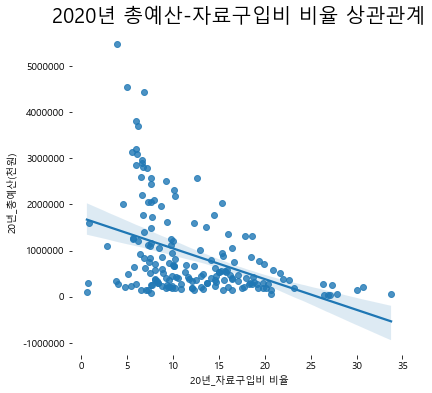

In [54]:
import scipy.stats as stats

# 자료구입비 값의 격차가 너무 큰 서울 도서관은 제외하도록 함
# 규모가 작을수록(예산이 적을수록) 도서관 직원 수 자체가 적으므로 자료구입비나 운영비 비율이 높게 나오는 듯..
plt.figure(figsize = (6,6))
plt.box(False)
plt.title("2020년 총예산-자료구입비 비율 상관관계", fontsize = 20)
p_budget = df_bud[df_bud['도서관명']!= '서울도서관']
sns.regplot(x = '20년_자료구입비 비율', y = '20년_총예산(천원)', data =p_budget)
corr_p = stats.pearsonr(p_budget['20년_자료구입비 비율'],p_budget['20년_총예산(천원)'] )
print("상관계수: %.3f | P-Value : %f"%(corr_p[0],corr_p[1]))

상관계수: -0.419 | P-Value : 0.000000


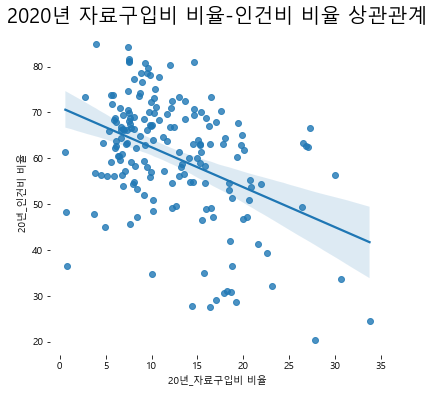

In [56]:
# 자료구입비 비율이 높을수록 인건비 비율이 낮음 - 인건비 비율이 낮을 수록, 즉 직원 수가 적을 수록 자료구입비 비율이 높아짐을 확인
plt.figure(figsize = (6,6))
plt.box(False)
plt.title("2020년 자료구입비 비율-인건비 비율 상관관계", fontsize = 20)
p_budget = df_bud[df_bud['도서관명']!= '서울도서관']
sns.regplot(x = '20년_자료구입비 비율', y = '20년_인건비 비율', data =p_budget)
corr_p = stats.pearsonr(p_budget['20년_자료구입비 비율'],p_budget['20년_인건비 비율'])
print("상관계수: %.3f | P-Value : %f"%(corr_p[0],corr_p[1]))

상관계수: 0.276 | P-Value : 0.000194


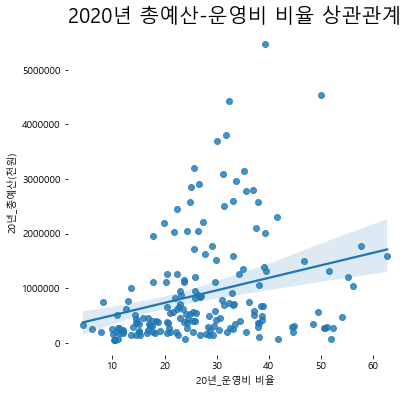

In [57]:
# 운영비가 총예산에서 차지하는 비율이 큼 --> 예산 자체가 인프라랑 관계가 있음을 보일 수 있을듯..?
plt.figure(figsize = (6,6))
plt.box(False)
plt.title("2020년 총예산-운영비 비율 상관관계", fontsize = 20)
p_budget = df_bud[df_bud['도서관명']!= '서울도서관']
sns.regplot(x = '20년_운영비 비율', y = '20년_총예산(천원)', data =p_budget)
corr_p = stats.pearsonr(p_budget['20년_운영비 비율'],p_budget['20년_총예산(천원)'] )
print("상관계수: %.3f | P-Value : %f"%(corr_p[0],corr_p[1]))

# 지역별 1관당 예산 파악

In [59]:
# 지역별 1관당 평균 예산
loc_bud = df_bud.groupby(['지역']).mean()
loc_bud.reset_index(inplace = True)
loc_bud.head()

,지역,2020 도서수,2019 도서수,2018 도서수,2020 시청각자료수,2019 시청각자료수,2018 시청각자료수,2020 전자저널수,2019 전자저널수,2018 전자저널수,...,19년_인건비 비율,19년_운영비 비율,20년_인건비(천원),20년_자료구입비(천원),20년_운영비(천원),20년_총예산(천원),20년_자료구입비 비율,20년_인건비 비율,20년_운영비 비율,예산증가율(%)
0,강남구,67789.230769,65895.153846,62827.153846,2215.538462,2287.538462,2076.076923,34.692308,565.076923,465.692308,...,67.957638,19.862525,475345.692308,84999.230769,175373.461538,735718.384615,11.844428,66.070628,22.084944,7.332948
1,강동구,109975.500000,111657.875000,109418.125000,2975.875000,3343.750000,3166.250000,198.750000,163.875000,59.750000,...,60.081170,26.441902,604220.625000,94324.125000,285206.000000,983750.750000,14.572839,61.572861,23.854299,-14.963200
2,강북구,62753.428571,61425.714286,61260.857143,1735.142857,1701.142857,1683.428571,0.142857,0.142857,0.142857,...,58.163450,33.391689,434955.428571,56906.571429,186851.571429,678713.571429,7.930016,67.077699,24.992284,0.467847
3,강서구,79414.777778,76659.555556,74033.222222,2852.666667,2717.888889,2545.222222,24.444444,25.888889,26.444444,...,61.131373,28.962602,580994.555556,87685.666667,225115.000000,893795.222222,11.505658,63.406947,25.087395,6.252812
4,관악구,80796.400000,82229.400000,81034.800000,1710.800000,1671.000000,1735.400000,1949.000000,1980.000000,2077.000000,...,49.309994,28.862518,224151.600000,81264.200000,166832.200000,472248.000000,16.878743,60.968667,22.152590,22.335312


Text(23.25, 2100000, '2,082,584')

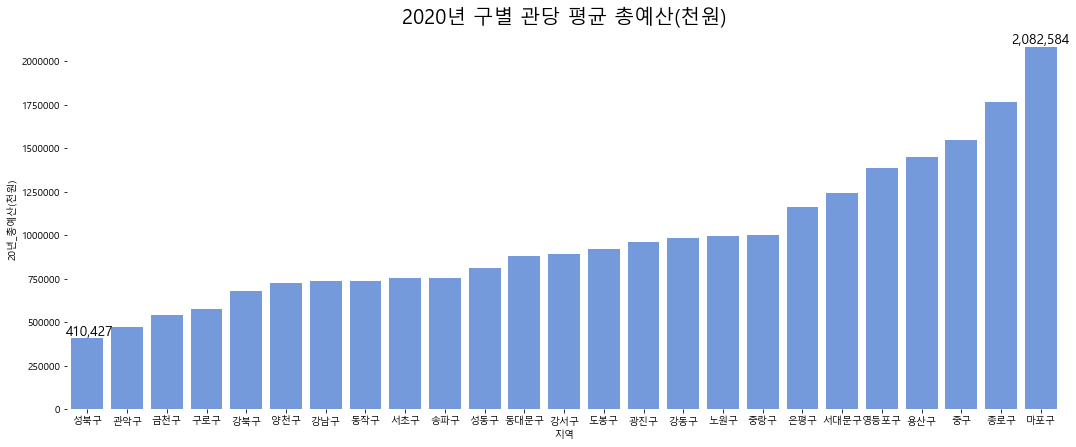

In [60]:
# 2020년 관당 평균 총예산
loc_bud.sort_values('20년_총예산(천원)', inplace = True)

plt.figure(figsize = (17.8,7))
sns.barplot(x='지역',y = '20년_총예산(천원)', data = loc_bud,color = 'cornflowerblue')
plt.box(False)
plt.title('2020년 구별 관당 평균 총예산(천원)', fontsize = 20)
plt.text(-0.535,426000,'410,427', fontsize = 13.5)
plt.text(23.25,2100000,'2,082,584', fontsize = 13.5)

Text(23.25, 1950000, '1,942,299')

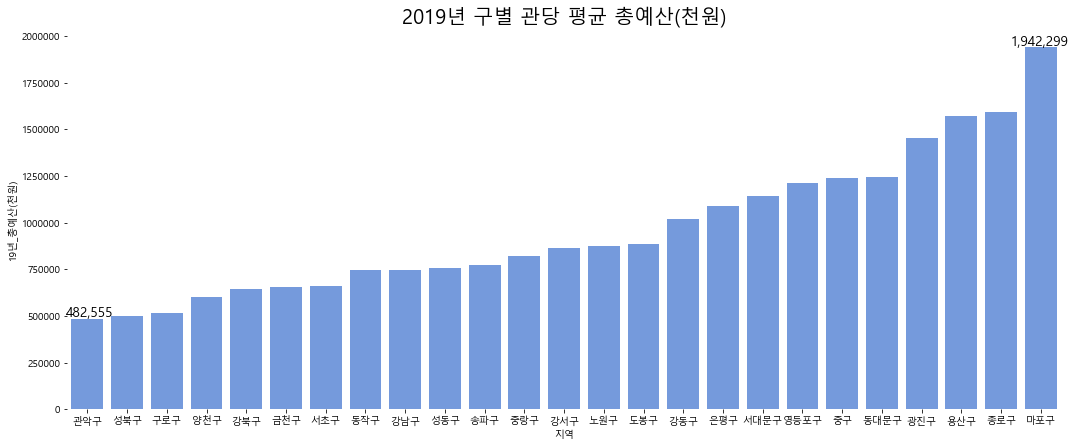

In [61]:
# 2019년 구별 관당 평균 총예산
loc_bud.sort_values('19년_총예산(천원)', inplace = True)

plt.figure(figsize = (17.8,7))
sns.barplot(x='지역',y = '19년_총예산(천원)', data = loc_bud,color = 'cornflowerblue')
plt.box(False)
plt.title('2019년 구별 관당 평균 총예산(천원)', fontsize = 20)
plt.text(-0.535,496000,'482,555', fontsize = 13.5)
plt.text(23.25,1950000,'1,942,299', fontsize = 13.5)

Text(23.6, 33, '31.4%')

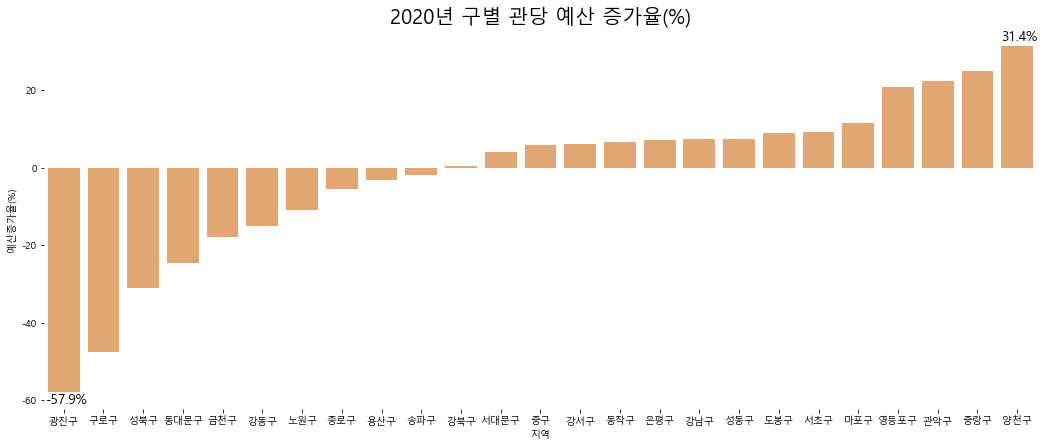

In [63]:
# 19-20년 구별 관당 예산 증가율
loc_bud.sort_values('예산증가율(%)', inplace = True)

plt.figure(figsize = (17.8,7))
sns.barplot(x='지역',y = '예산증가율(%)', data = loc_bud,color = 'sandybrown')
plt.box(False)
plt.title('2020년 구별 관당 예산 증가율(%)', fontsize = 20)
plt.text(-0.47,-61,'-57.9%', fontsize = 13.5)
plt.text(23.6,33,'31.4%', fontsize = 13.5)

### (+) 총예산과 예산 증가율간의 상관관계

In [65]:
def pearson_corr(data, col, col2):
    corr_p = stats.pearsonr(data[col], data[col2])

def pearson_corr_2(data, col, col2):
    corr_p = stats.pearsonr(data[col], data[col2])
    return([corr_p[0],corr_p[1]])

상관계수:-0.07919886785639609 | P-Value : 0.29195545037063847


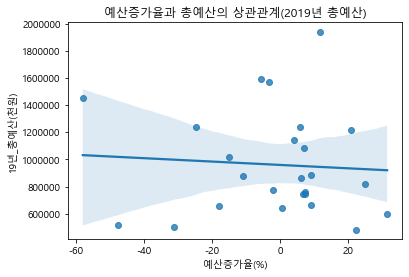

In [68]:
plt.title("예산증가율과 총예산의 상관관계(2019년 총예산)")
sns.regplot(x = '예산증가율(%)', y = '19년_총예산(천원)', data =loc_bud)
corr_p = stats.pearsonr(df_bud['예산증가율(%)'],df_bud['19년_총예산(천원)'] )
print("상관계수:" + str(corr_p[0]) + " | "+ "P-Value : " + str(corr_p[1]))

상관계수:0.09176002893504993 | P-Value : 0.2218423478657305


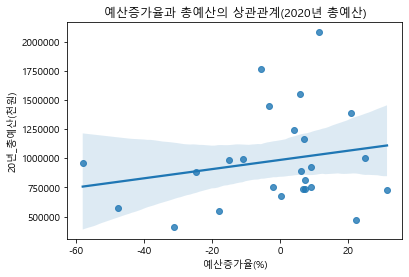

In [69]:
plt.title("예산증가율과 총예산의 상관관계(2020년 총예산)")
sns.regplot(x = '예산증가율(%)', y = '20년_총예산(천원)', data =loc_bud)
corr_p = stats.pearsonr(df_bud['예산증가율(%)'],df_bud['20년_총예산(천원)'] )
print("상관계수:" + str(corr_p[0]) + " | "+ "P-Value : " + str(corr_p[1]))

### (+) 구별 도서관 예산 총합에서 개별 도서관이 평균적으로 차지하는 예산 비율

In [70]:
loc_sum_bud_per20 = pd.DataFrame(df_bud.groupby(['지역']).mean()['20년_총예산(천원)']/df_bud.groupby(['지역']).sum()['20년_총예산(천원)']*100)
loc_sum_bud_per20.columns = ['전체총예산_대비_개별_도서관_예산비율(20년)']
loc_sum_bud_per20.reset_index(inplace = True)
loc_sum_bud_per20.sort_values('전체총예산_대비_개별_도서관_예산비율(20년)',inplace = True)
loc_sum_bud_per19 = pd.DataFrame(df_bud.groupby(['지역']).mean()['19년_총예산(천원)']/df_bud.groupby(['지역']).sum()['19년_총예산(천원)']*100)
loc_sum_bud_per19.columns = ['전체총예산_대비_개별_도서관_예산비율(19년)']
loc_sum_bud_per19.reset_index(inplace = True)
loc_sum_bud_per19.sort_values('전체총예산_대비_개별_도서관_예산비율(19년)', inplace = True)

loc_sum_bud_per = pd.merge(loc_sum_bud_per19,loc_sum_bud_per20, on = '지역', how = 'inner')
loc_sum_bud_per
loc_sum_bud_per.to_csv('LocBudPercent.csv', encoding='cp949')


Text(23.6, 25.3, '25%')

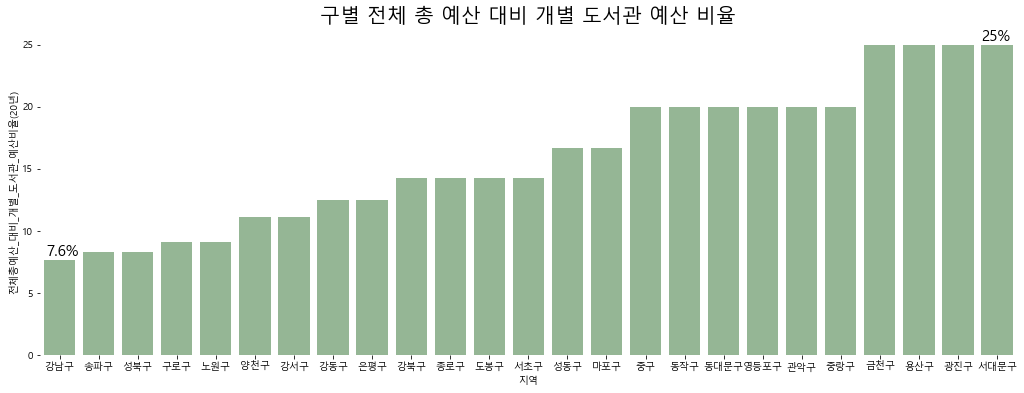

In [71]:
plt.figure(figsize= (17.5,6))
plt.box(False)
plt.title("구별 전체 총 예산 대비 개별 도서관 예산 비율", fontsize = 20)
sns.barplot(x= '지역', y = '전체총예산_대비_개별_도서관_예산비율(20년)', data = loc_sum_bud_per, color ='darkseagreen' )
plt.text(-0.35,8,'7.6%',fontsize=15)
plt.text(23.6,25.3,'25%',fontsize=15)

- 구별 전체 예산대비 개별 도서관 예산 비율 상위 5: 서대문구, 광진구, 용산구, 금천구, 중랑구
- 구별 전체 예산대비 개별 도서관 예산 비율 하위 5: 강남구, 송파구, 성북구, 구로구, 노원구 